# Ejercicio Práctico: Análisis de Recompra en una Campaña de Marketing

**Objetivo:** Usar técnicas de modelizado y visualización de datos para predecir si un cliente realizará una recompra luego de haber recibido una promoción.

1. Comprensión del problema <br/>
Contexto: Un área de marketing quiere saber si los clientes que recibieron promociones volverán a comprar (recompra), y qué variables influyen más en esa decisión.

    Preguntas guía:
    - ¿Recibir una promoción realmente influye en la recompra?
    - ¿Importa el monto de la promoción?
    - ¿Influye la edad o el ingreso?

In [1]:
import pandas as pd

### Carga y exploración del dataset.

En esta etapa, es donde voy a preparar los datos para el posterior análisis.

- En primer lugar, voy a leer el dataset `.xlsx` con Pandas
- Utilizando la función `.head()`, muestro las primeras 5 filas del DataFrame.

In [65]:
df = pd.read_excel("Mini_Proyecto_Clientes_Promociones.xlsx")
df.head()

,Cliente_ID,Genero,Edad,Recibio_Promo,Monto_Promo,Recompra,Total_Compras,Ingreso_Mensual
0,1,F,23,Si,500,Si,2,30000
1,2,M,45,Si,500,Si,2,40000
2,3,F,60,No,700,No,3,60000
3,4,M,22,Si,800,No,1,30000
4,5,M,32,Si,300,Si,2,50000


- Ahora, utilizo la función `.info()` para obtener información relevante acerca de las columnas. <br/>
Con esto, puedo saber si las columnas estan en un formato correcto, y también observar que no tengan filas con valores nulos.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cliente_ID       20 non-null     int64 
 1   Genero           20 non-null     object
 2   Edad             20 non-null     int64 
 3   Recibio_Promo    20 non-null     object
 4   Monto_Promo      20 non-null     int64 
 5   Recompra         20 non-null     object
 6   Total_Compras    20 non-null     int64 
 7   Ingreso_Mensual  20 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 1.4+ KB


**Observaciones:** El DataFrame no tiene valores nulos. Se puede deducir viendo que en la columna del contador de los no nulos, se puede observar de que todas las columnas cuentan con la misma cantidad de no nulos.

- Con la función `.describe()` generan un resumen estadístico del DataFrame. 

In [50]:
df.describe()

,Cliente_ID,Edad,Monto_Promo,Total_Compras,Ingreso_Mensual
count,20.00000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,44.450000,560.000000,2.800000,43000.000000
std,5.91608,16.047544,208.755712,1.321881,13514.125164
min,1.00000,22.000000,100.000000,1.000000,25000.000000
25%,5.75000,33.500000,475.000000,2.000000,30000.000000
50%,10.50000,43.000000,500.000000,3.000000,42500.000000
75%,15.25000,57.000000,700.000000,3.250000,55000.000000
max,20.00000,70.000000,900.000000,6.000000,65000.000000


Declaro la columna `Cliente_ID` como el índice del dataframe.

In [51]:
df = df.set_index('Cliente_ID')
df

,Genero,Edad,Recibio_Promo,Monto_Promo,Recompra,Total_Compras,Ingreso_Mensual
Cliente_ID,,,,,,,
1,F,23,Si,500,Si,2,30000
2,M,45,Si,500,Si,2,40000
3,F,60,No,700,No,3,60000
4,M,22,Si,800,No,1,30000
5,M,32,Si,300,Si,2,50000
6,M,54,No,500,Si,3,30000
7,F,67,No,600,Si,5,45000
8,F,70,No,500,No,2,55000
9,F,25,Si,700,No,3,30000


# Transformación y codificación

- Convertir variables categóricas a numéricas.
- Crear nuevas variables si es necesario.

In [52]:
df['Genero'] = df['Genero'].map({'F': 0, 'M':1})
df['Recibio_Promo'] = df['Recibio_Promo'].map({'Si': 1, 'No': 0})
df['Recompra'] = df['Recompra'].map({'Si': 1, 'No': 0})

In [53]:
# Mantener solo edades >= 0
df = df[df['Edad'] >= 0]

In [54]:
df

,Genero,Edad,Recibio_Promo,Monto_Promo,Recompra,Total_Compras,Ingreso_Mensual
Cliente_ID,,,,,,,
1,0,23,1,500,1,2,30000
2,1,45,1,500,1,2,40000
3,0,60,0,700,0,3,60000
4,1,22,1,800,0,1,30000
5,1,32,1,300,1,2,50000
6,1,54,0,500,1,3,30000
7,0,67,0,600,1,5,45000
8,0,70,0,500,0,2,55000
9,0,25,1,700,0,3,30000


# Visualización de relaciones clave
- Recompra vs. Monto de promoción
- Recompra vs. Ingreso mensual
- Distribución por género y edad

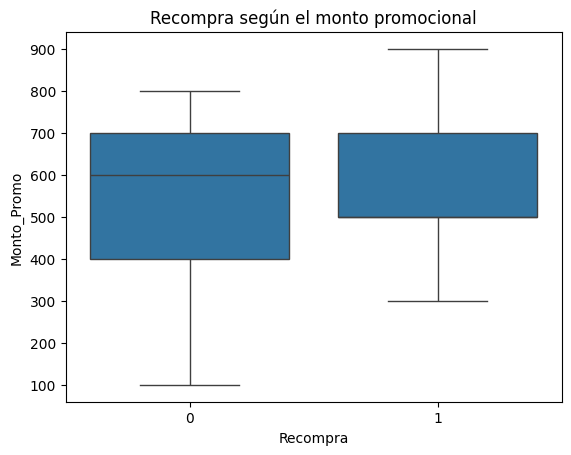

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Recompra", y="Monto_Promo", data=df)
plt.title("Recompra según el monto promocional")
plt.show()

**Observaciones:** Se observa que ambos grupos tienen medianas similares cercanas a 600. El grupo que no recompra tiene bigotes extendidos. O sea, tiene mayor variabilidad en el rango de compras y su comportamiento es mas heterogeneo. Mientras tanto, los que recompran tienen comportamiento más heterogeneo.
- Hay mas chances que los clientes que reciben montos promocionales menores a 400 no recompren.
- Si recibe una oferta mayor a 800, hay mas probabilidad de que recompren.

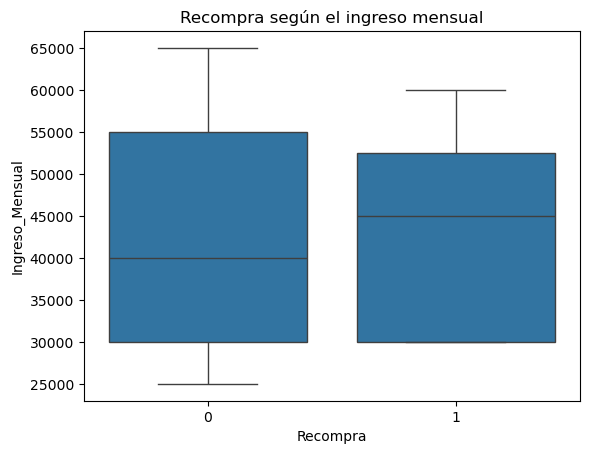

In [31]:
sns.boxplot(x="Recompra", y="Ingreso_Mensual", data=df)
plt.title("Recompra según el ingreso mensual")
plt.show()

**Observaciones:** El gráfico casi que no nos muestras grandes diferencias. Lo que si se puede ver es que en los que no recompran, la dispersión es algo mayor.

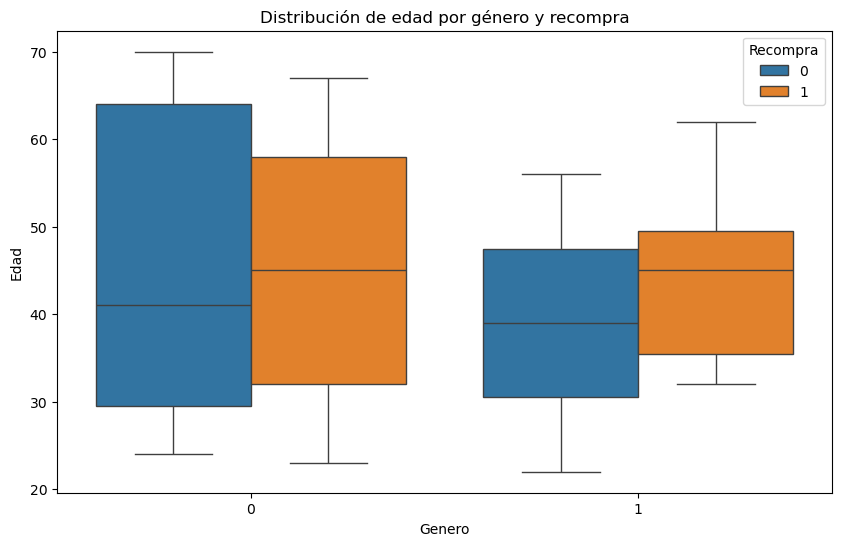

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Genero', y='Edad', hue='Recompra')
plt.title('Distribución de edad por género y recompra')
plt.show()

**Observaciones:** La edad parece tener una leve influencia en la recompra: las personas mayores (40-50 años) tienden a recomprar más que las más jóvenes. Las mujeres muestran mayor variabilidad en las edades, mientras que los hombres tienen distribuciones más concentradas.